# Ken Jee YouTube Data

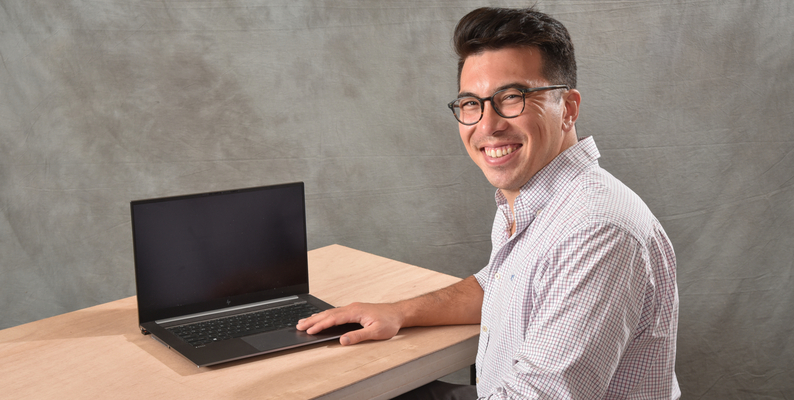

## Overview and Problem Statement
This is the dataset for analyzing **Ken Jee's YouTube Channel**. Data is by video and over time. We wil be looking at answers to some of the questions mentioned below:

- What are the themes of the comment data?
- What types of video titles and thumbnails drive the most traffic?
- Who is his core audience and what are they interested in?
- What types of videos have lead to the most growth?
- What type of content are people engaging with the most or watching the longest?





There are four files in this repo. The relevant data included in most of them is from Nov 2017 - Jan 2022. Data was gathered by Ken himself via the YouTube API and his analytics.

1) **Aggregated Metrics By Video** - This has all the topline metrics from his channel from its start (around 2015 to Jan 22 2022).

2) **Aggregated Metrics By Video with Country and Subscriber Status** - This has the same data as aggregated metrics by video, but it includes dimensions for which country people are viewing from and if the viewers are subscribed to the channel or not.

3) **Video Performance Over Time** - This has the daily data from each of Ken's videos.

4) **All Comments** - This is all of my comment data gathered from the YouTube API. The data was anonymized by Ken for the audience privacy.

Let's go!

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import nltk
import string 
import re
from transformers import pipeline
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Now that we have imported all the required libraries and the classes, we start reading the Data with the help of pandas and taking a look at the data.

In [2]:
Aggregated_df = pd.read_csv('/kaggle/input/ken-jee-youtube-data/Aggregated_Metrics_By_Video.csv')
Country_df = pd.read_csv('/kaggle/input/ken-jee-youtube-data/Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
Video_df = pd.read_csv('/kaggle/input/ken-jee-youtube-data/Video_Performance_Over_Time.csv')
Comments_df = pd.read_csv('/kaggle/input/ken-jee-youtube-data/All_Comments_Final.csv')

In [3]:
Aggregated_df.head()

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
3,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
4,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,"Aug 29, 2020",375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01


In [4]:
Country_df.head()

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0


In [5]:
Video_df.head() 

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.126049,338.567500,0
3,19 Jan 2022,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,https://i.ytimg.com/vi/3TrAYmrmA8o/hqdefault.jpg,1,0,0,0,0,0,0.011508,11.278000,0
4,19 Jan 2022,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,https://i.ytimg.com/vi/Xgg7dIKys9E/hqdefault.jpg,1,0,0,0,0,0,0.007541,21.900000,0


In [6]:
Comments_df.head()

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21T20:24:20Z,sHRq-LshG3U,user_2816


In [7]:
# Setting the font and figure size parameters for our charts
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

## Exploratory Data Analysis 
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [8]:
Aggregated_df.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,19.750000,12.208250,9.947100e+04,1.925000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
75%,66.250000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,230.500000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


In [9]:
print('Net Subscribers Gained -', Aggregated_df['Sub­scribers gained'].loc[0]-Aggregated_df['Sub­scribers lost'].loc[0])

Net Subscribers Gained - 183451


In [10]:
Video_df.describe()

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
count,111857.000000,111857.000000,111857.000000,111857.000000,111857.000000,111857.000000,111857.000000,110510.000000,110510.000000,111857.0
mean,874.615876,49.714287,2.095533,0.052424,0.086789,1.169180,0.026391,0.350456,216.769428,0.0
std,861.297667,316.557515,14.263695,1.852013,1.793532,12.109065,0.313908,0.232566,190.709651,0.0
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,375.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178010,117.379080,0.0
50%,548.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.336824,181.505000,0.0
75%,917.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.476257,268.126888,0.0
max,5029.000000,35677.000000,1610.000000,289.000000,420.000000,1844.000000,32.000000,8.476340,5322.300000,0.0


In [11]:
Country_df.describe()

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
count,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,53854.000000,53854.000000,55292.0
mean,896.678073,100.573157,4.239311,0.106055,0.175577,2.365279,0.053389,0.347821,205.297156,0.0
std,927.380801,1704.966002,65.291451,2.507351,3.601171,65.889539,0.766945,0.259734,206.542106,0.0
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,375.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145948,85.442891,0.0
50%,545.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320983,170.139725,0.0
75%,934.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.486153,259.449958,0.0
max,5029.000000,285593.000000,9165.000000,399.000000,436.000000,9599.000000,103.000000,4.967797,5027.660000,0.0


**Analysis** 

1. Ken has pushed out 223 videos in last 6 years on which he has received 39640 shares and 225,021 likes and gained 183,451 subscribers.
2. Ken usually get 126 comments on his videos on an average.
3. The average watch time is 2835 hours on 223 videos that Ken has been able to produce for the viewers.

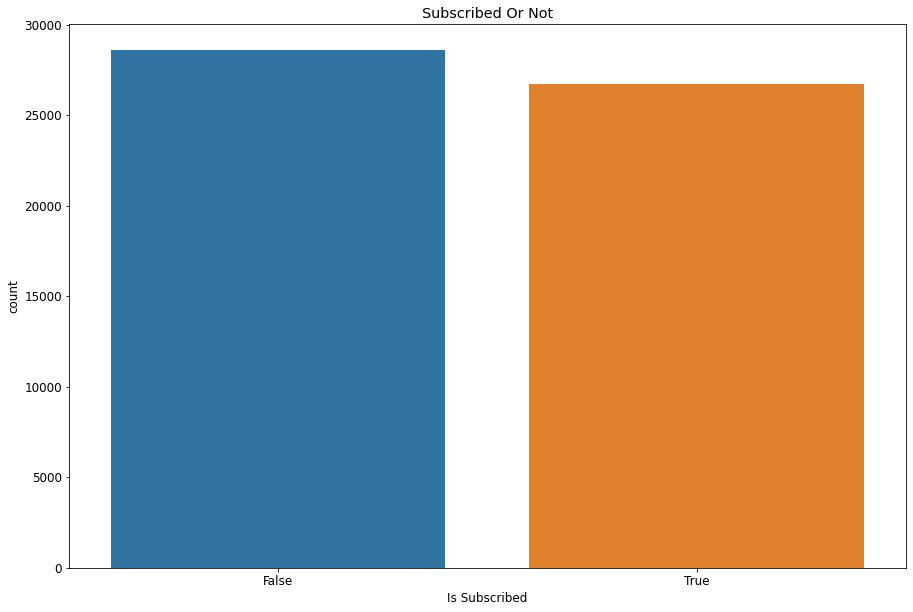

In [12]:
Subscribed_df = Country_df.copy().sort_values(by='Views',ascending= False)
plt.title("Subscribed Or Not")
sns.countplot(x= Subscribed_df['Is Subscribed']);

In [13]:
True_df = Country_df[Country_df['Is Subscribed'].eq(True)].sort_values(by='Views',ascending= False)
False_df = Country_df[Country_df['Is Subscribed'].eq(False)].sort_values(by='Views',ascending= False)
True_df['Video Title'].head(10).unique().tolist()

['How I Would Learn Data Science (If I Had to Start Over)',
 'The Best Free Data Science Courses Nobody is Talking About',
 '3 Proven Data Science Projects for Beginners (Kaggle)',
 'Beginner Kaggle Data Science Project Walk-Through (Titanic)',
 'Data Science Project from Scratch - Part 1 (Project Planning)',
 'The Projects You Should Do To Get A Data Science Job']

Above are the videos that are most watched by people who have subsribed to the channel.

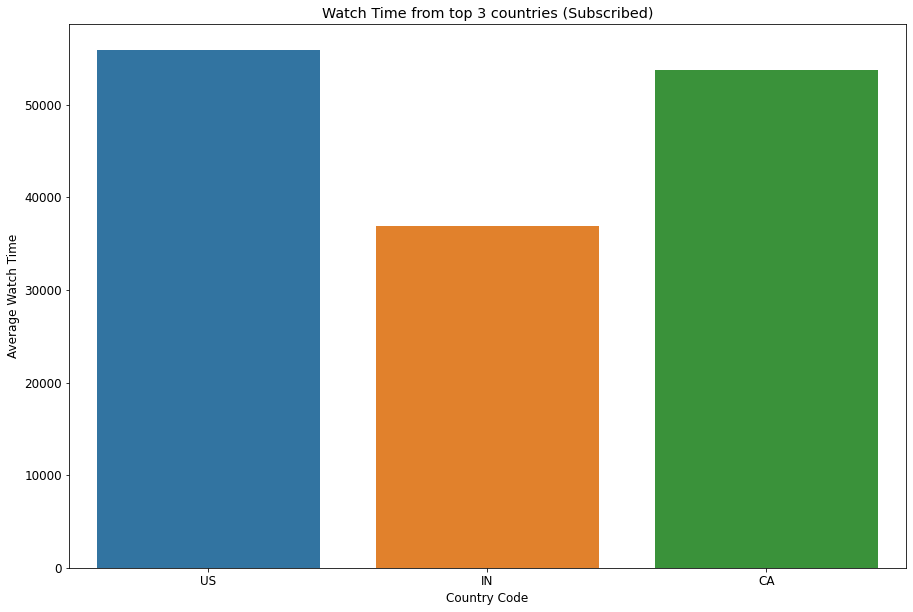

In [14]:
Subscribed_Watchtime = True_df.groupby('Country Code').sum().sort_values(by='Views',ascending= False).head(3).reset_index()
plt.title("Watch Time from top 3 countries (Subscribed)")
plt.xlabel('Country Code')
sns.barplot(x=Subscribed_Watchtime['Country Code'], y= Subscribed_Watchtime['Average Watch Time']);

People who have subscribed to the channel are from US and Great Britain and contribute to the highest Average Watch Time.

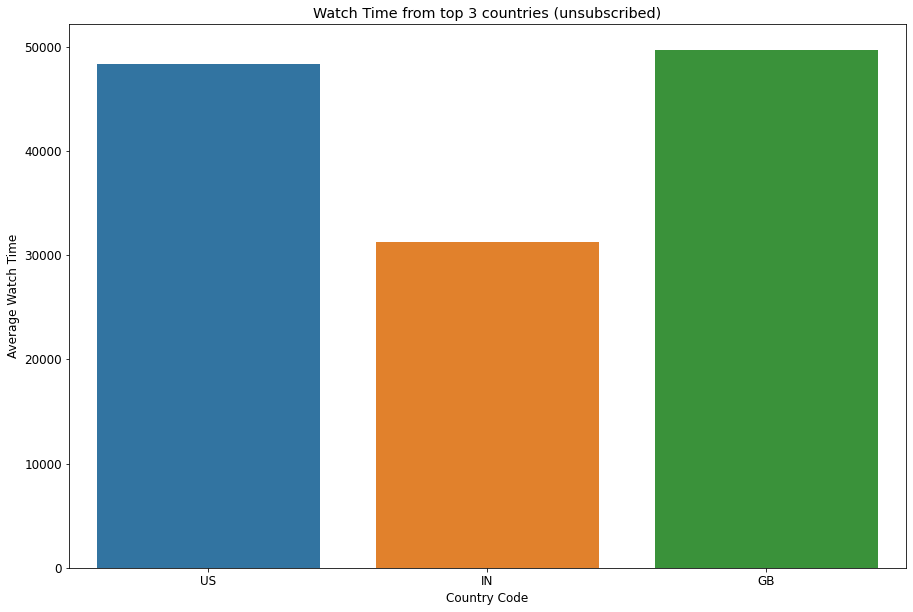

In [15]:
unsubscribed_Watchtime = False_df.groupby('Country Code').sum().sort_values(by='Views',ascending= False).head(3).reset_index()
plt.title("Watch Time from top 3 countries (unsubscribed)")
plt.xlabel('Country Code')
sns.barplot(x=unsubscribed_Watchtime['Country Code'], y= unsubscribed_Watchtime['Average Watch Time']);

The most amount of watchtime from the unsubscribed viewers come from Britain then US and then India.

In [16]:
False_df['Video Title'].head(12).unique().tolist()

['How I Would Learn Data Science (If I Had to Start Over)',
 'The Best Free Data Science Courses Nobody is Talking About',
 '3 Proven Data Science Projects for Beginners (Kaggle)',
 'Data Science Certificate vs Bootcamp vs Masters Degree',
 "Why You Probably Won't Become a Data Scientist"]

Above is the list of videos being watched the most by the unsubscribed viewers.

## **Q. Who is Ken's core audience and what are they interested in?**

In [17]:
#Top 10 countries where the audience is from
ViewsbyCountry = Country_df[['Country Code', 'Views']].copy().sort_values(by='Views',ascending= False)
ViewsbyCountry.groupby('Country Code').sum().sort_values(by='Views',ascending= False).head(5)

,Views
Country Code,
US,1354450
IN,1155510
GB,239177
CA,222373
DE,172165


People from **US, India and Great Britain** watch the videos the most.

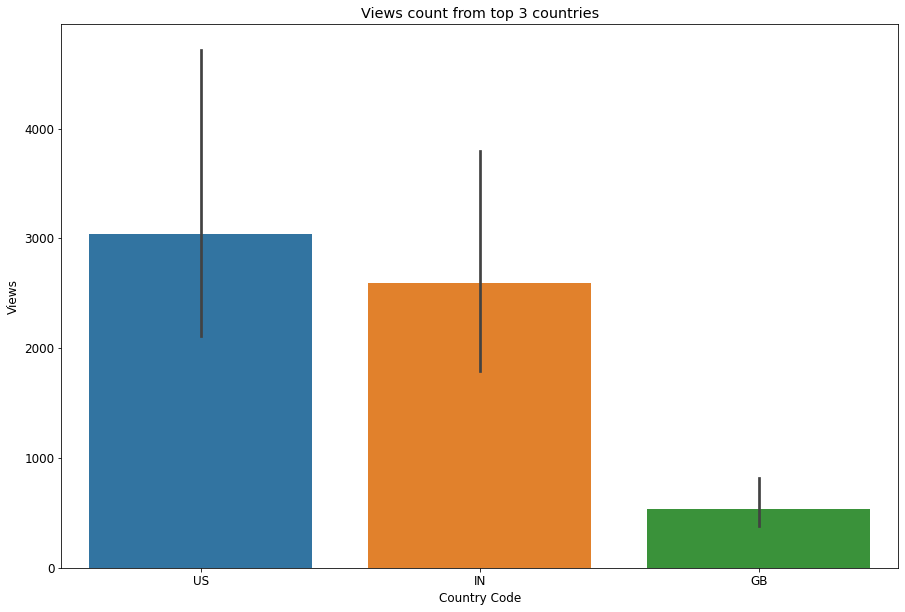

In [18]:
df = Country_df[['Video Title', 'Views', 'Average Watch Time', 'Country Code']].copy().sort_values(by='Views',ascending= False)
US_df = df[df['Country Code']=='US']
IN_df = df[df['Country Code']=='IN']
GB_df = df[df['Country Code']=='GB']
audience = pd.concat([US_df, IN_df, GB_df], axis=0, sort=False).sort_values(by='Views',ascending= False)
plt.title("Views count from top 3 countries")
plt.xlabel('Views')
sns.barplot(x=audience['Country Code'] , y= audience['Views']);

In [19]:
audience.groupby('Video Title').sum().sort_values(by='Views',ascending= False).head(5).index.tolist()

['How I Would Learn Data Science (If I Had to Start Over)',
 'The Best Free Data Science Courses Nobody is Talking About',
 '3 Proven Data Science Projects for Beginners (Kaggle)',
 'Beginner Kaggle Data Science Project Walk-Through (Titanic)',
 'The Projects You Should Do To Get A Data Science Job']

The people from **US, India** and **Great Britain** watch these top 5 videos the most
- 'How I Would Learn Data Science (If I Had to Start Over)',
- 'The Best Free Data Science Courses Nobody is Talking About',
- '3 Proven Data Science Projects for Beginners (Kaggle)',
- 'Beginner Kaggle Data Science Project Walk-Through (Titanic)',
- 'Data Science Certificate vs Bootcamp vs Masters Degree']

In [20]:
fig = px.histogram(audience, 
                   x='Average Watch Time', 
                   color="Country Code",
                   nbins=30,
                   title='Average Watch Time distribution in top 3 countries')
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'}) #removes the background
fig.update_layout(bargap=0.1)
fig.show()

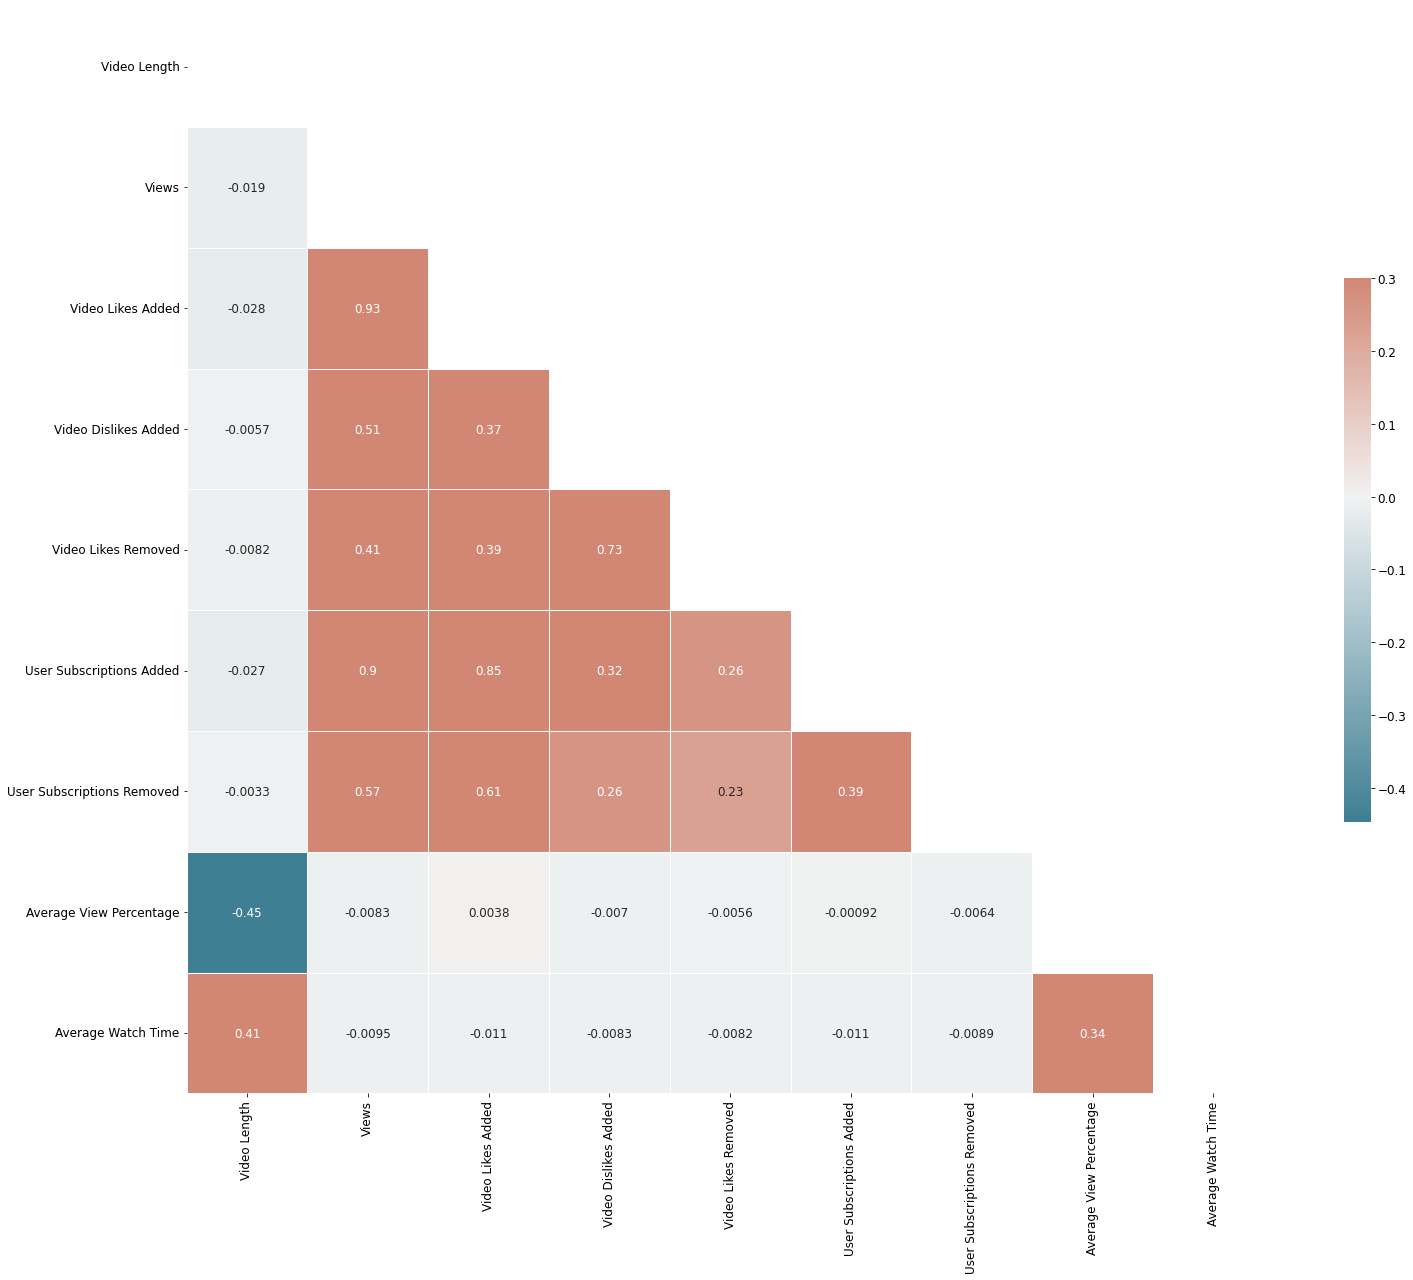

In [21]:
corr = Video_df[['Video Length', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Subscriptions Added',
       'User Subscriptions Removed', 'Average View Percentage',
       'Average Watch Time']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

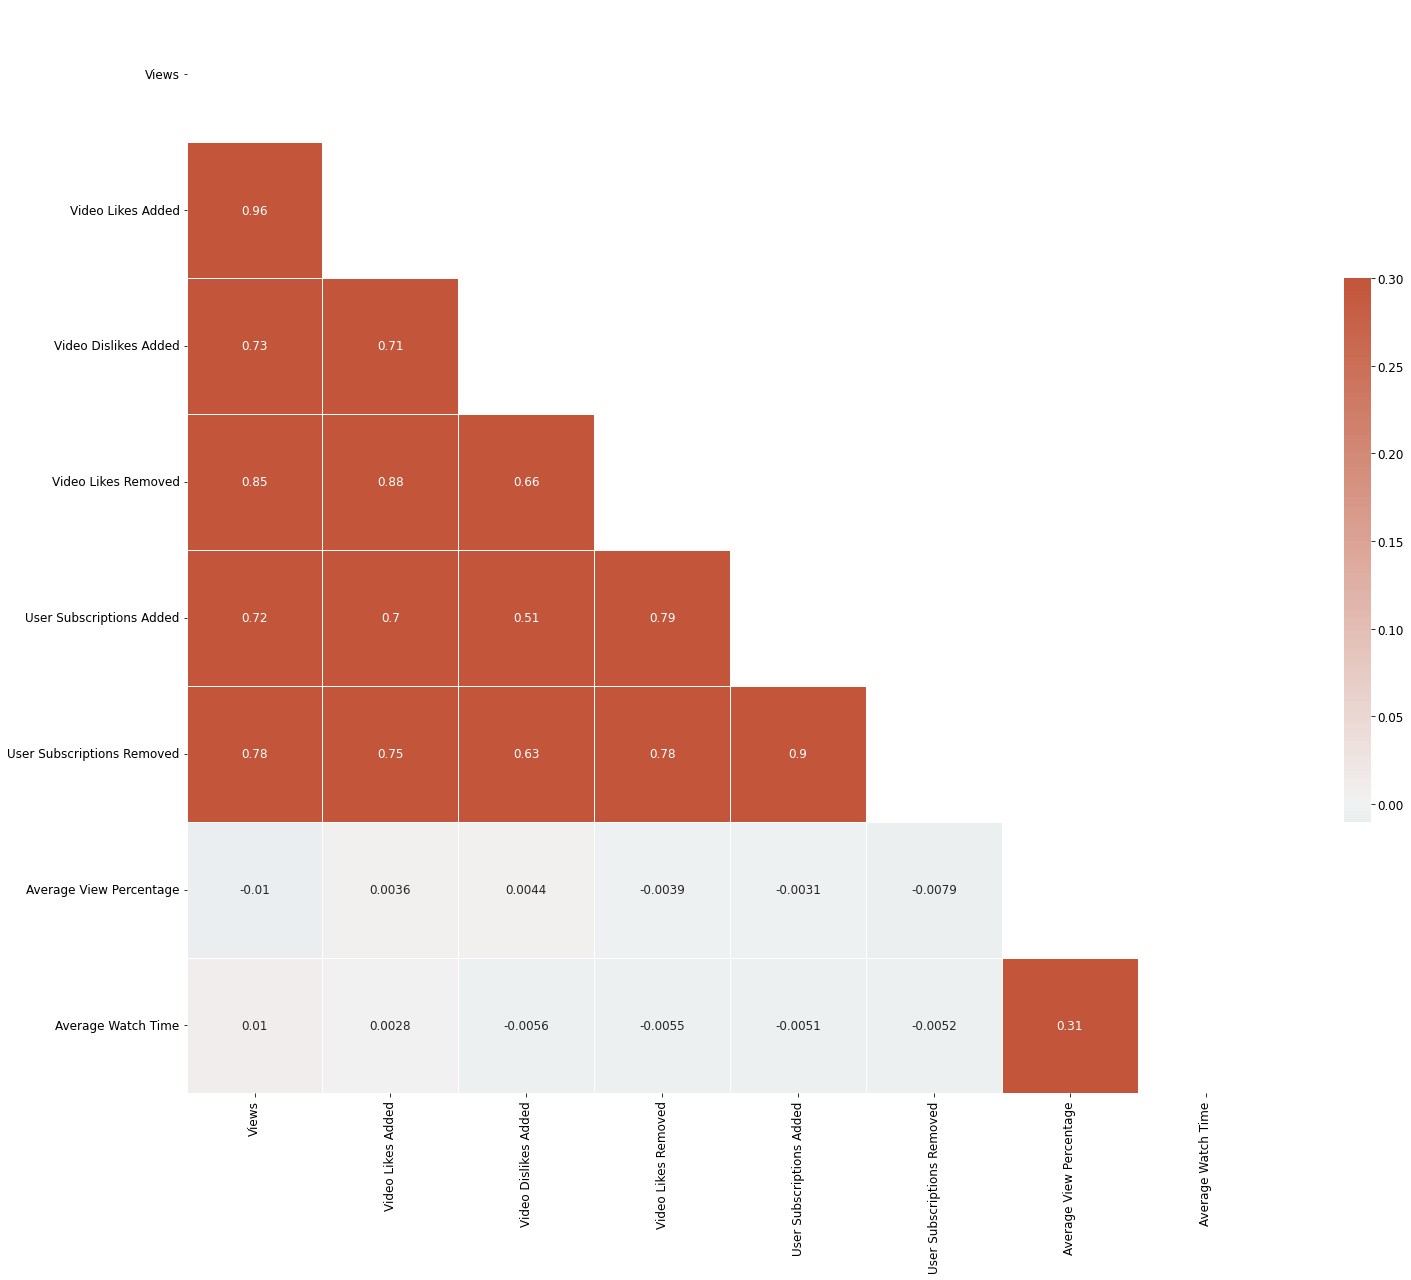

In [22]:
corr = True_df[['Country Code', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

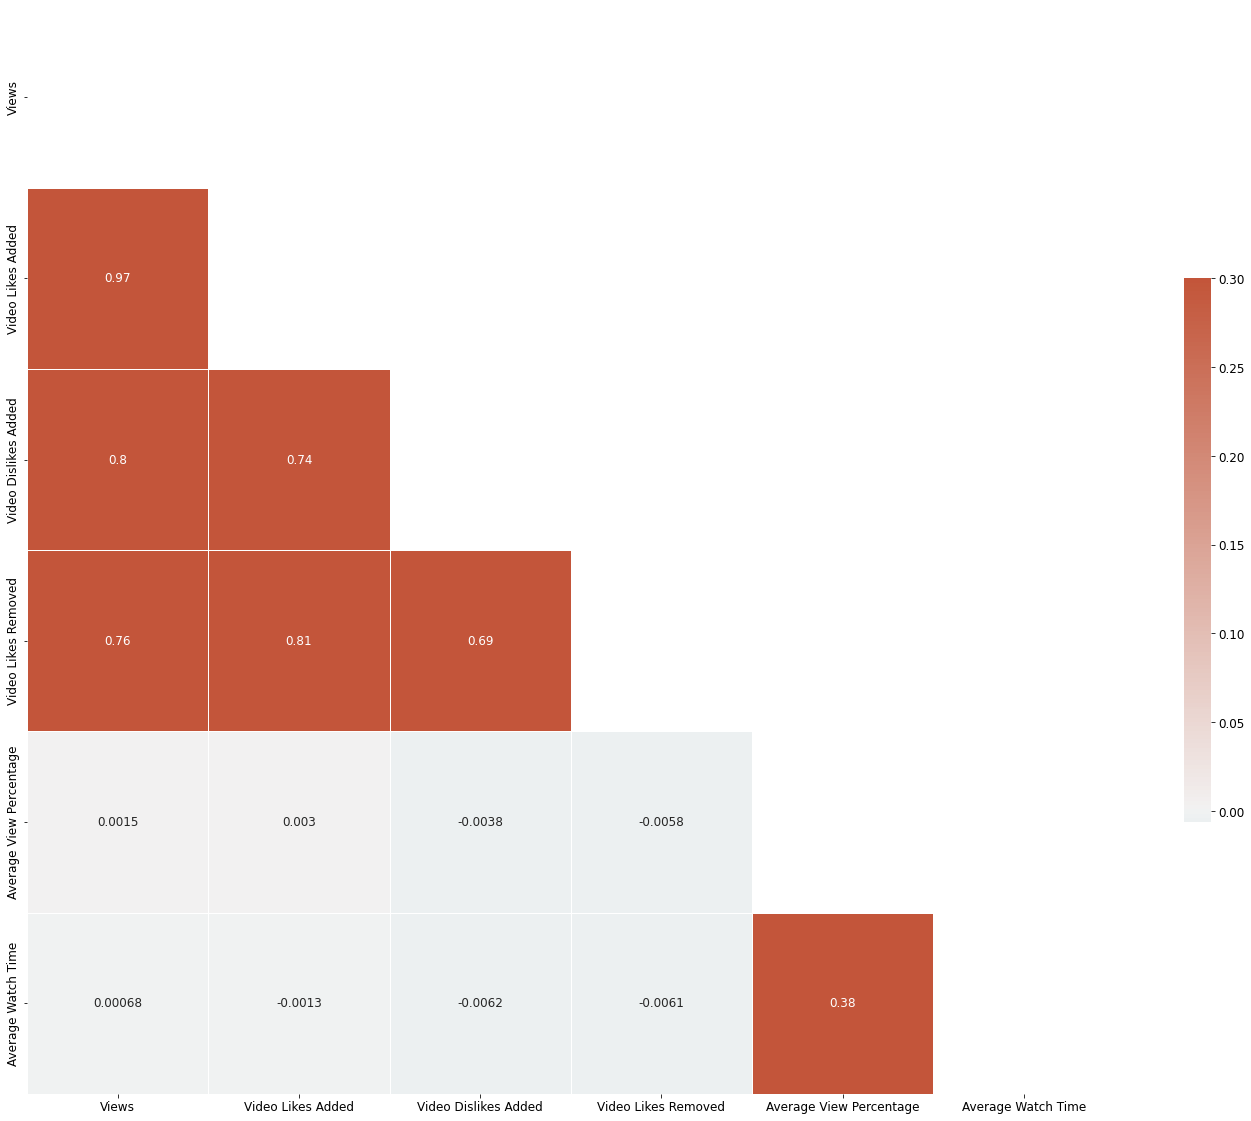

In [23]:
corr = False_df[['Country Code', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'Average View Percentage', 'Average Watch Time']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25,20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

## **Q: What type of content are people engaging with the most or watching the longest?**

In [24]:
#Top 5 videos that have garnered the most views
Views_df = Video_df[['Video Title','External Video ID', 'Views']].copy().sort_values(by='Views',ascending= False)
Views_df.drop_duplicates('Video Title',inplace=True)
Views_df['Video Title'].head(10).values.tolist()

['How I Would Learn Data Science (If I Had to Start Over)',
 'How I Learned Data Science',
 'Reviewing Your Data Science Projects - Episode 5 (Very Detailed Project)',
 'Different Data Science Roles Explained (by a Data Scientist)',
 'Why I Quit Data Science',
 'The State of Data Science with Krish Naik & The Data Professor [Panel Discussion]',
 'How I Would Learn Data Science in 2022 (If I Had to Start Over)',
 "Why You Probably Won't Become a Data Scientist",
 'Is Data Science Right For You?',
 'Reviewing Your Data Science Projects - Episode 4 (Resume & Github)']

From the results, evidently people are keen to know about 
- Data Science Roadmap
- Projects
- Roles in Datascience

In [25]:
Video_df.groupby('Video Title').sum().sort_values(by='Average Watch Time',ascending= False).head(5).index.tolist()

['Uber Driver to Machine Learning Engineer in 9 Months! (@Daniel Bourke) - KNN EP. 05',
 'Data Science Project from Scratch - Part 4 (Exploratory Data Analysis)',
 'Data Science Fundamentals: Data Manipulation in Python (Pandas)',
 'Data Science Project from Scratch - Part 3 (Data Cleaning)',
 'Advice from a Data Analytics CEO (@How to Get an Analytics Job) - KNN EP. 17']

Top 5 videos that have been watched the longest are:- 

- 'Uber Driver to Machine Learning Engineer in 9 Months! (@Daniel Bourke) - KNN EP. 05',
- 'Data Science Project from Scratch - Part 4 (Exploratory Data Analysis)',
- 'Data Science Fundamentals: Data Manipulation in Python (Pandas)',
- 'Data Science Project from Scratch - Part 3 (Data Cleaning)',
- 'Advice from a Data Analytics CEO (@How to Get an Analytics Job) - KNN EP. 17'

## **Q. What are the themes of the comment data?**

In this section we will be doing Sentiment analysis of the comments and most commented video too.

## Sentiment analysis
Sentiment analysis (also known as opinion mining or emotion AI) is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. 

Sentiment analysis is widely applied to voice of the customer materials such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine. 

We are going to be doing Sentiment Analysis using the HuggingFace library and find out if our comments are negative or positive.

In [26]:
print('Comments on videos - ', format(len(Comments_df['Comments'])))
print('Unique Videos - ', format(Comments_df['VidId'].nunique()))
print('Comments per Video -', format(len(Comments_df['Comments'])/Comments_df['VidId'].nunique()))

Comments on videos -  10240
Unique Videos -  222
Comments per Video - 46.126126126126124


In [27]:
#storing the string values
comments = Comments_df.Comments.values

#Removing any character that is not a letter
cleancomments = re.sub('[^a-zA-Z]', ' ',str(comments))

In [28]:
classifier = pipeline("zero-shot-classification") 
sentiment_labels = ['positive','negative']
sent = classifier(cleancomments, sentiment_labels)

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

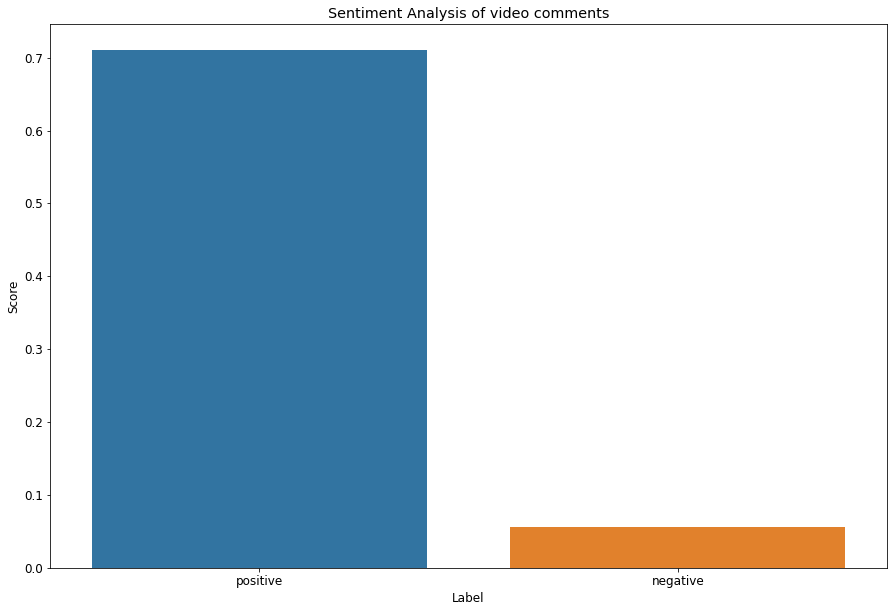

In [29]:
filter_key1 = ['labels']
filter_key2 = ['scores']
result = classifier(comments, sentiment_labels, multi_label=True)
scores_df = pd.DataFrame()
scores_df['Label'] = result['labels']
scores_df['Score'] = result['scores']
plt.title("Sentiment Analysis of video comments")
sns.barplot(x=scores_df['Label'] , y= scores_df['Score']);

In [30]:
scores_df

,Label,Score
0,positive,0.710353
1,negative,0.055364


As we see that our classifier has made the predictions and has given the score of 71% positive to the comments so we could say that the audience on the channel is supportive of the videos being put out.

In [31]:
#Most Commented Video
topcommentsdf = pd.pivot_table(Comments_df, index = 'VidId', values = 'Comment_ID', aggfunc = 'count').sort_values('Comment_ID', ascending = False)
topcommentsdf.reset_index(inplace=True)
New_df = topcommentsdf.merge(Aggregated_df,left_on='VidId', right_on='Video' )
New_df.groupby('Video title').sum().sort_values(by='Comment_ID',ascending= False).reset_index().head(5)

,Video title,Comment_ID,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,How I Would Learn Data Science (If I Had to St...,797,907,9583,942,46903,451,46904,6.353,12.835,36.65,1253559,65850.7042,46453,7959.533,26498799,3.14
1,The Best Free Data Science Courses Nobody is T...,262,294,4694,75,19464,131,10734,4.097,9.124,33.80,297222,10465.0467,10603,1217.046,4512254,3.24
2,Data Science Certificate vs Bootcamp vs Master...,224,239,456,48,2708,37,1576,8.315,17.543,36.21,92355,9057.2752,1539,767.493,2247912,2.78
3,How I Would Learn Data Science in 2021 (What H...,219,232,741,63,5869,57,3358,7.526,15.786,41.01,123515,7724.2735,3301,929.400,1699309,3.93
4,3 Proven Data Science Projects for Beginners (...,205,220,1935,64,14708,72,9508,3.733,9.247,35.26,237467,10560.3597,9436,885.504,3137644,4.01


## **Q. What types of video titles and thumbnails drive the most traffic?**

In [32]:
Video_df[['Video Title','Thumbnail link', 'Average View Percentage','Average Watch Time']].copy().sort_values(by='Average Watch Time',ascending= False).drop_duplicates('Video Title')['Video Title'].head(10).values.tolist()

['Ken Jee Q & A Live Stream (50,000 Sub Special!)',
 '100K Channel Update + AMA Stream!',
 'Data Science Explained with ... Cooking?',
 'Sports Analytics & Streaming Data Science on Twitch (Nick Wan) - KNN EP. 08',
 'Data Science Fundamentals: Data Cleaning in Python',
 'I Eat a Papaya Live on Stream (Plus Q&A for 150K Subs!)',
 'His Startup Will Land You a Data Science Job (Jeremie Harris) - KNN EP. 15',
 'The Data Science Interview: What to Expect',
 'Data Science Productivity, Motivation, and Organization (ft. Data Professor & Codebasics)',
 'Fast Cars to Faster Data (Alex Castrounis) - KNN EP. 12']

Video titles with words **Live, Stream, Fundamentals** and **Data Science** gets the most traffic

## **Q. What types of videos have led to the most growth?**

In [33]:
Aggregated_df[['Video','Video title','Sub­scribers gained' ]].copy().sort_values(by='Sub­scribers gained',ascending= False).drop([0]).head(5)['Video title'].values.tolist()

['How I Would Learn Data Science (If I Had to Start Over)',
 'The Best Free Data Science Courses Nobody is Talking About',
 '3 Proven Data Science Projects for Beginners (Kaggle)',
 'How I Would Learn Data Science in 2021 (What Has Changed?)',
 'Data Science Project from Scratch - Part 1 (Project Planning)']

Videos that led to the most growth of the channel are:- 
1. Data Science Roadmap, 
2. Data Science Free Resources; and 
3. Data Science Projects

## Summary

1. The top 3 countries where the most of the viewership comes from are **US, India** and **Great Britain**. 
2. The videos that get most of the views are on topics of **Data Science Roadmap and Data Science projects**. 
3. The videos that have led to the most growth of the channel talk about **Data Science Free Resources and Data Science Roadmap.**

You can follow Ken Jee's channel on this link - https://www.youtube.com/c/KenJee1. Ken also has a podcast where he interviews people in data field - https://www.youtube.com/c/KensNearestNeighborsPodcast

## Resources
1. http://youtube.com/c/1littlecoder
2. https://plotly.com/python/histograms/

I hope this was insightful. If you liked going through the notebook and found some value, please be sure to leave an upvote. Once again, Thanks Ken for putting out your YouTube data to help the community make projects.